Denoising Problem

Weiner Filter 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from transformers import pipeline

In [2]:
def wiener_filter(observed_image, noise_var):

    F_observed = np.fft.fft2(observed_image)

    PSD_observed = np.abs(F_observed) ** 2

    wiener_filter = np.conj(PSD_observed) / (PSD_observed + noise_var)

    filtered_image = np.fft.ifft2(F_observed * wiener_filter).real
    return filtered_image

In [3]:
def add_gaussian_noise(image, noise_var):
    row, col = image.shape
    mean = 0
    sigma = np.sqrt(noise_var)
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = np.float64(image) + gauss
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image

In [4]:
observed_image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
noise_var = 10

In [6]:
noisy_img = add_gaussian_noise(observed_image , noise_var)

In [7]:
denoised_image = wiener_filter(noisy_img,noise_var)

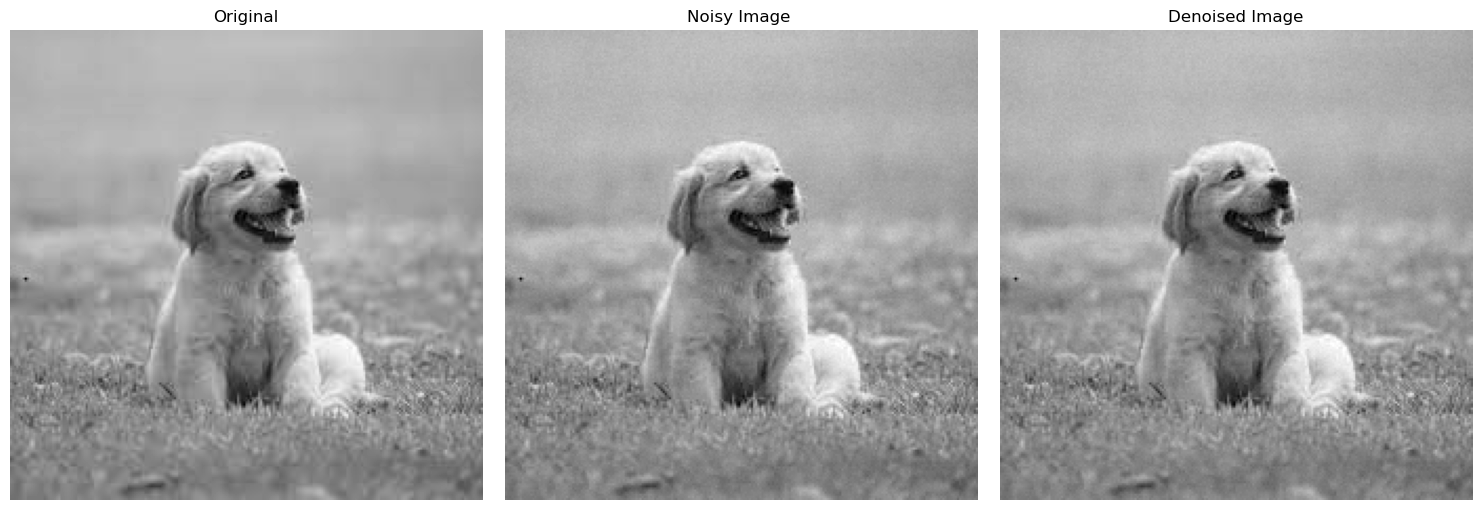

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(observed_image.astype(np.float32), cmap='gray') 
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(noisy_img.astype(np.float32), cmap='gray')
axes[1].set_title(f'Noisy Image ')
axes[1].axis('off')

axes[2].imshow(denoised_image.astype(np.float32), cmap='gray')
axes[2].set_title(f'Denoised Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Map Estimation

In [9]:
def map_estimation(observed_image, noise_var, prior_var):

    map_estimate = (prior_var / (prior_var + noise_var)) * observed_image

    return map_estimate

In [10]:
noise_var = 150.0  
prior_var = 1

In [11]:
noisy_img = add_gaussian_noise(observed_image , noise_var)

In [12]:
denoised_image = map_estimation(noisy_img, noise_var, prior_var)

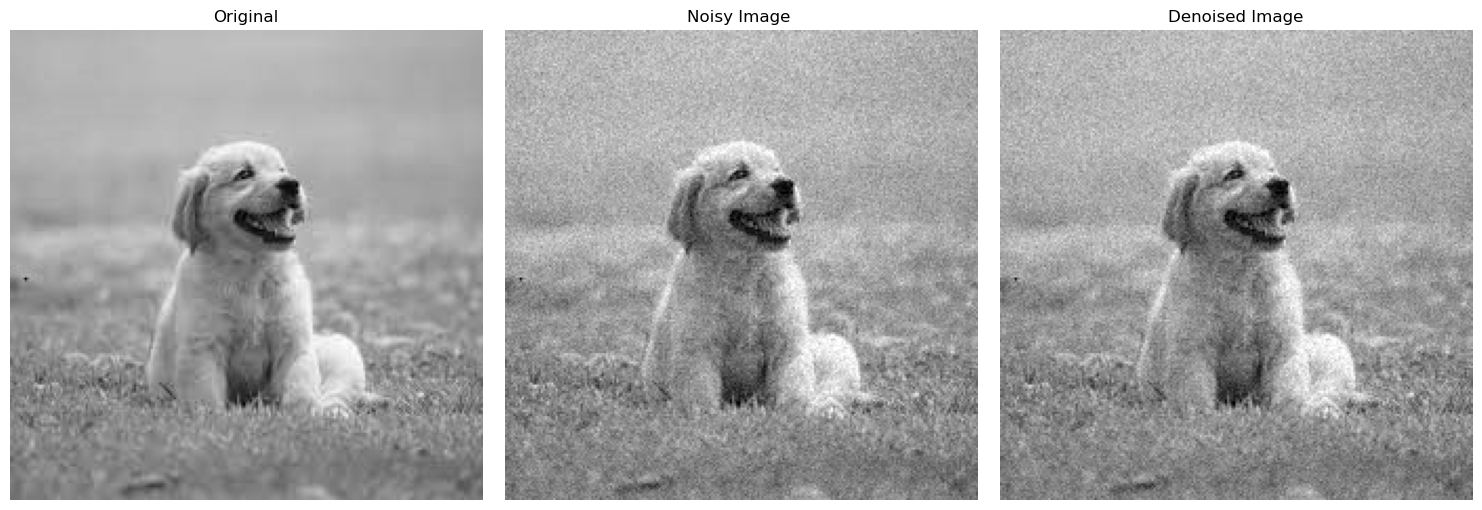

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(observed_image.astype(np.float32), cmap='gray') 
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(noisy_img.astype(np.float32), cmap='gray')
axes[1].set_title(f'Noisy Image ')
axes[1].axis('off')

axes[2].imshow(denoised_image.astype(np.float32), cmap='gray')
axes[2].set_title(f'Denoised Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()


DL 

In [14]:
#!https://github.com/grishavak/LIDIA-denoiser

In [15]:
noisy_img = add_gaussian_noise(observed_image , noise_var)
cv2.imwrite('noisy_dog.png' , noisy_img)

True

In [ ]:
!python code/denoise_rgb.py --in_path r'D:/Semester_6/Image_Processing/CIA2/img.png' --out_path r'D:/Semester_6/Image_Processing/CIA2' 

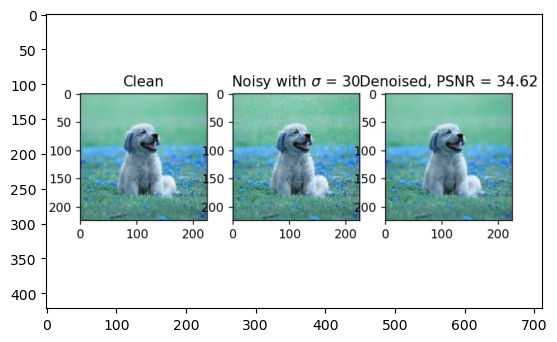

In [3]:
import cv2 
import matplotlib.pyplot as plt 
img__ = cv2.imread('D:\Semester_6\Image_Processing\CIA2\dog_den.png')
plt.imshow( img__ )